<a href="https://colab.research.google.com/github/haviet12/Artificial_Inteligent/blob/main/class(31_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import pandas as pd
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


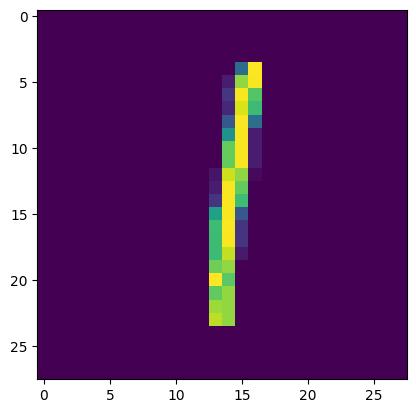

so nay la:  1


In [ ]:
digit=train_images[3380]
import matplotlib.pyplot as plt

plt.imshow(digit)
plt.show()
print('so nay la: ',train_labels[3380])

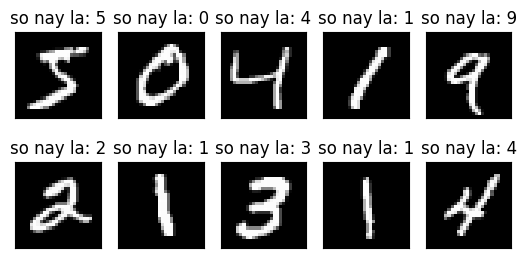

In [ ]:
for i in range(10):
  plt.subplot(3,5,i+1)## khoi tao so cot, so hang cho bieu do
  plt.tight_layout
  plt.imshow(train_images[i], cmap='gray',interpolation='none')
  plt.title(f'so nay la: {train_labels[i]}')
  plt.xticks([])
  plt.yticks([])

In [ ]:
#########################
from keras.models import Sequential ## ham tuan tu (sequential) xet tuan tu cac lop trong mang luoi ANN
from keras.layers import Dense
from keras import models
#Dense = full_connected (ket noi day du cac te bao trong mang luoi)
model = Sequential()
model.add(Dense(512,activation='relu', input_shape=(28*28*1,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_images= train_images.reshape((60000,28*28)) # chuyen 60000 tam anh theo mang (28,28) ve 1 chieu 28*28
train_images = train_images.astype('float32')/255.0 # chuyen du lieu ve dang float chayj tu 0 -> 1
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255.0


In [ ]:
from keras.utils import to_categorical # chuyen du lieu 1bit thanh nbit dau ra

train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [ ]:
from tensorflow import keras
from keras import metrics
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics= ['accuracy'])
model.fit(train_images,train_labels,epochs=20,batch_size=128)
test_loss, test_accur=model.evaluate(test_images, test_labels)
print('do mat mat', test_loss)
print('do chinh xac:', test_accur)
# print(f'do mat mat: {test_loss}')
# print(f'do chinh xac: {test_accur}')

Epoch 1/20
469/469 [==============================] - 11s 20ms/step - loss: 0.2684 - accuracy: 0.9218
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1082 - accuracy: 0.9689
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0712 - accuracy: 0.9792
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0515 - accuracy: 0.9849
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0394 - accuracy: 0.9881
Epoch 6/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0293 - accuracy: 0.9914
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0226 - accuracy: 0.9938
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0170 - accuracy: 0.9953
Epoch 9/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0132 - accuracy: 0.9965
Epoch 10/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0100 - accur

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


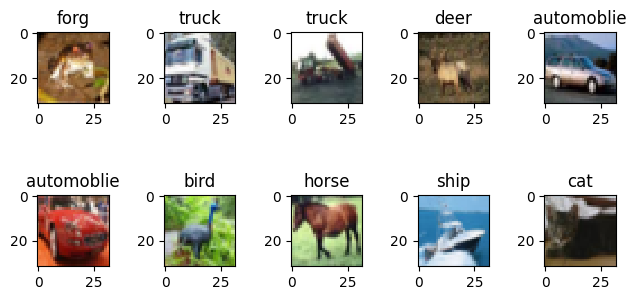

In [ ]:
############# anh RGB ################
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


pic_name=['Airplane',"automoblie",'bird','cat','deer','dog','forg','horse','ship','truck']
import matplotlib.pyplot as plt
for i in range (10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title(f'{pic_name[int(y_train[i])]}')




In [ ]:
from keras.models import Sequential ## ham tuan tu (sequential) xet tuan tu cac lop trong mang luoi ANN
from keras.layers import Dense
from keras import models
#Dense = full_connected (ket noi day du cac te bao trong mang luoi)
model = Sequential()
model.add(Dense(512,activation='relu', input_shape=(32*32*3,),name='input'))
model.add(Dense(512,activation='relu', input_shape=(32*32*3,), name='hiden_1'))
model.add(Dense(10,activation='softmax',name='output'))
model.summary()
x= x_train
y=y_train

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 512)               1573376   
                                                                 
 hiden_1 (Dense)             (None, 512)               262656    
                                                                 
 output (Dense)              (None, 10)                5130      
                                                                 
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train =x_train.reshape((50000, 32*32*3)) 
y_train= y_train.astype('float32')/255.0
x_test =x_test.reshape((10000, 32*32*3))
y_test = y_test.astype('float32')/255.0
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 3072)
(50000, 1)
(10000, 3072)
(10000, 1)


In [ ]:
from keras.utils import to_categorical # chuyen du lieu 1bit thanh nbit dau ra
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
from tensorflow import keras
from keras import metrics
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics= ['accuracy'])

model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))
t_loss, t_accur=model.evaluate(x_test, y_test)

print(f'do mat mat: {t_loss}')
print(f'do chinh xac: {t_accur}')

Epoch 1/10
1563/1563 [==============================] - 45s 28ms/step - loss: 0.1776 - accuracy: 0.9994 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.

1/1 [==============================] - 0s 62ms/step
Airplane


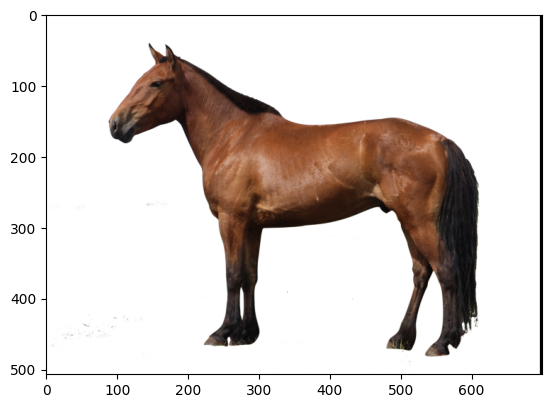

In [ ]:
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
import numpy as np

url = 'horse.jpg'
img = load_img(url)
plt.imshow(img)
img = load_img(url, target_size= (32,32))
img = img_to_array(img)
img = img.reshape((1,32*32*3))
img = img.astype('float32')
img = img/255
a = int(np.argmax(model.predict(img), axis = 1))
# class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(pic_name[a])